In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Load the dataset
df = pd.read_csv('chequing.csv')

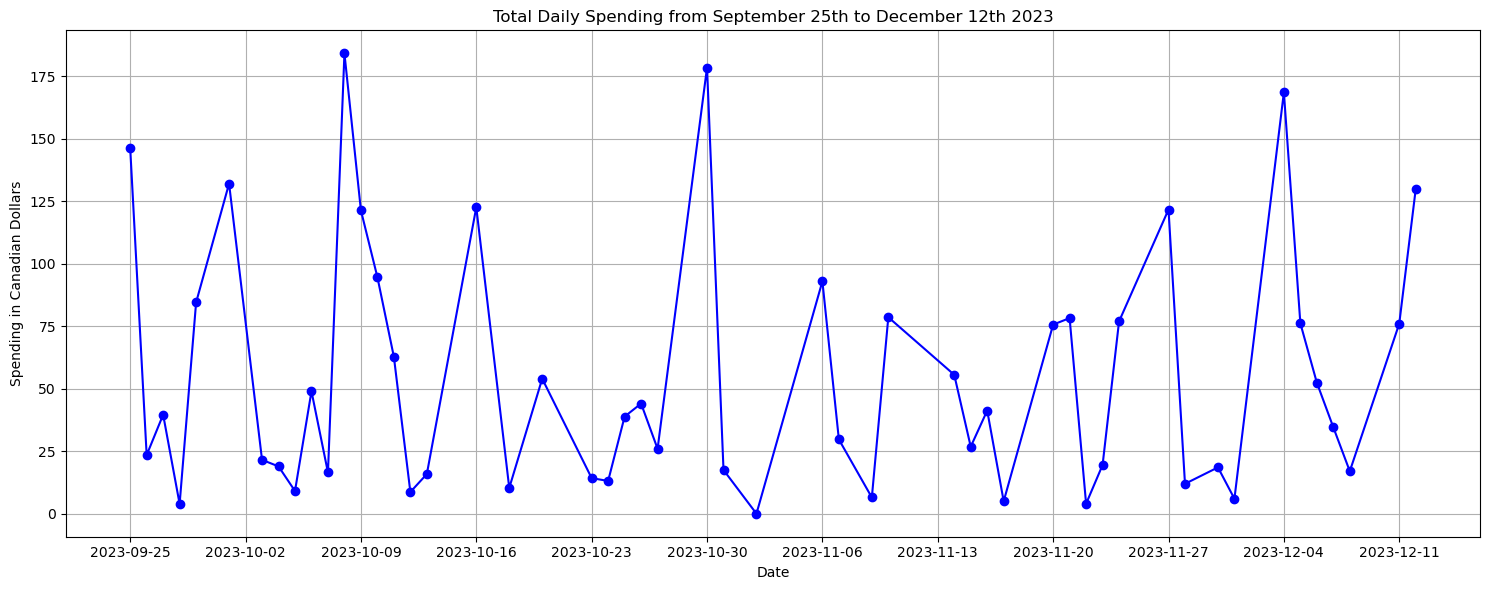

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import WeekdayLocator, DateFormatter

# Assuming 'df' is the DataFrame with the date and balance columns
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')  # Make sure the data is sorted by date

# Filter the DataFrame to only include the desired date range.
start_date = "2023-09-25"
end_date = "2023-12-12"
mask = (df['date'] >= start_date) & (df['date'] <= end_date)
filtered_df = df.loc[mask]

# Calculate spending (sum up all transactions daily)
filtered_df['transaction'] = pd.to_numeric(df['transaction'], errors='coerce').fillna(0)

# Fill NaN values with 0 for the first transaction or no spending
filtered_df['transaction'].fillna(0, inplace=True)

# Aggregate spending by day
daily_spending = filtered_df.groupby(filtered_df['date'].dt.date)['transaction'].sum()

# Plotting the aggregated daily spending as a line graph
plt.figure(figsize=(15, 6))  # Increased figure size for better visibility
plt.plot(daily_spending.index, daily_spending, color='blue', marker='o', linestyle='-')

plt.title('Total Daily Spending from September 25th to December 12th 2023')
plt.xlabel('Date')
plt.ylabel('Spending in Canadian Dollars')
plt.grid(True)


# Set x-axis major locator to WeekdayLocator for weekly ticks
plt.gca().xaxis.set_major_locator(WeekdayLocator(byweekday=0))  # 0 for Monday
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))


# Rotate the date labels for better readability
plt.xticks(rotation=0)

# Adjust the plot to ensure everything fits without overlapping
plt.tight_layout()
plt.show()

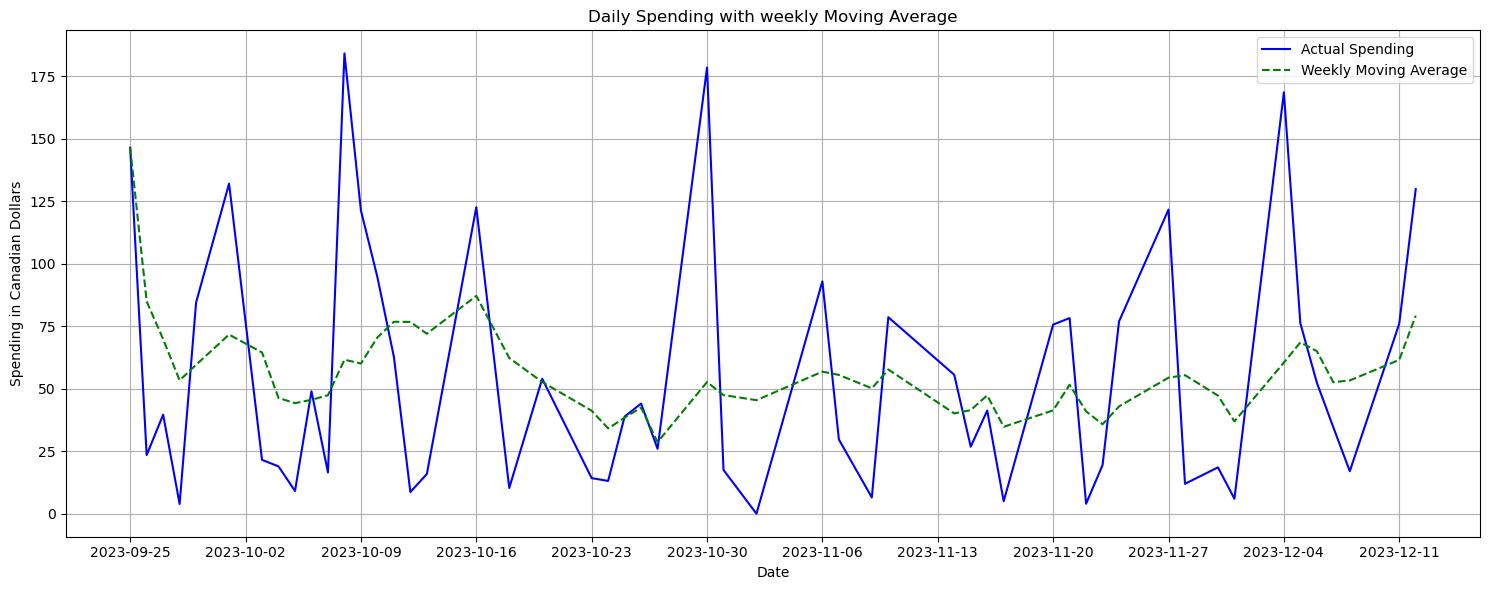

Now because we had a bit of an oscilating graph, we have performed a moving average of this data to smoothen the trend of the graph.


In [10]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from datetime import datetime
from matplotlib.dates import WeekdayLocator, DateFormatter

# Your existing code for data preparation
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Filter the DataFrame
start_date = "2023-09-25"
end_date = "2023-12-12"
mask = (df['date'] >= start_date) & (df['date'] <= end_date) # all the dates that are not in the bound are ignored
filtered_df = df.loc[mask] 

# Calculate daily spending
filtered_df['transaction'] = pd.to_numeric(filtered_df['transaction'], errors='coerce').fillna(0)
daily_spending = filtered_df.groupby(filtered_df['date'].dt.date)['transaction'].sum().reset_index()


daily_spending['date'] = pd.to_datetime(daily_spending['date'])

# Prepare data for linear regression
# Convert dates to numerical format (number of days since the start date)
daily_spending['date_num'] = (daily_spending['date'] - daily_spending['date'].min()).dt.days

# Fit the linear regression model
X = daily_spending['date_num'].values.reshape(-1, 1)
y = daily_spending['transaction'].values
model = LinearRegression().fit(X, y)

# Predict spending for each date
predicted_spending = model.predict(X)

# Calculate a 3-day moving average of daily spending
daily_spending['week_avg'] = daily_spending['transaction'].rolling(window=7, min_periods=1).mean()

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(daily_spending['date'], daily_spending['transaction'], color='blue', linestyle='-', label='Actual Spending')
plt.plot(daily_spending['date'], daily_spending['week_avg'], color='green', linestyle='--', label='Weekly Moving Average')

plt.title('Daily Spending with weekly Moving Average')
plt.xlabel('Date')
plt.ylabel('Spending in Canadian Dollars')
plt.grid(True)



# Set x-axis major locator to WeekdayLocator for weekly ticks
plt.gca().xaxis.set_major_locator(WeekdayLocator(byweekday=0))  # 0 for Monday
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))


plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

print("Now because we had a bit of an oscilating graph, we have performed a moving average of this data to smoothen the trend of the graph.")


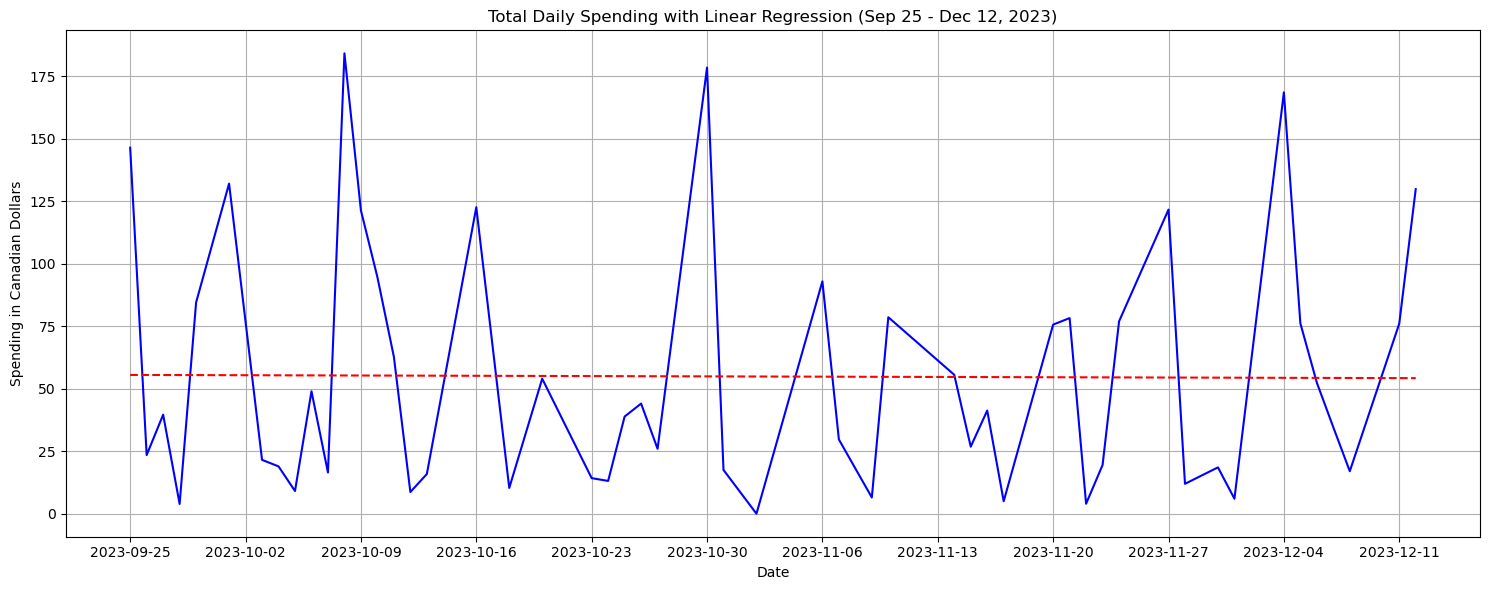

My linear regression slope is:   -0.016522297354042384
Spending trend has been in a quite uniform slope for 2 months


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from datetime import datetime
from matplotlib.dates import WeekdayLocator, DateFormatter

# Your existing code for data preparation
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Filter the DataFrame
start_date = "2023-09-25"
end_date = "2023-12-12"
mask = (df['date'] >= start_date) & (df['date'] <= end_date) # all the dates that are not in the bound are ignored
filtered_df = df.loc[mask] 

# Calculate daily spending
filtered_df['transaction'] = pd.to_numeric(filtered_df['transaction'], errors='coerce').fillna(0)
daily_spending = filtered_df.groupby(filtered_df['date'].dt.date)['transaction'].sum().reset_index()


daily_spending['date'] = pd.to_datetime(daily_spending['date'])

# Prepare data for linear regression
# Convert dates to numerical format (number of days since the start date)
daily_spending['date_num'] = (daily_spending['date'] - daily_spending['date'].min()).dt.days

# Fit the linear regression model
X = daily_spending['date_num'].values.reshape(-1, 1)
y = daily_spending['transaction'].values
model = LinearRegression().fit(X, y)

# Predict spending for each date
predicted_spending = model.predict(X)

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(daily_spending['date'], daily_spending['transaction'], color='blue', linestyle='-', label='Actual Spending')
plt.plot(daily_spending['date'], predicted_spending, color='red', linestyle='--', label='Regression Line')

plt.title('Total Daily Spending with Linear Regression (Sep 25 - Dec 12, 2023)')
plt.xlabel('Date')
plt.ylabel('Spending in Canadian Dollars')
plt.grid(True)

# Set x-axis major locator to WeekdayLocator for weekly ticks
plt.gca().xaxis.set_major_locator(WeekdayLocator(byweekday=0))  # 0 for Monday
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

slope = model.coef_[0]
print("My linear regression slope is:  ", slope)
print("Spending trend has been in a quite uniform slope for 2 months")

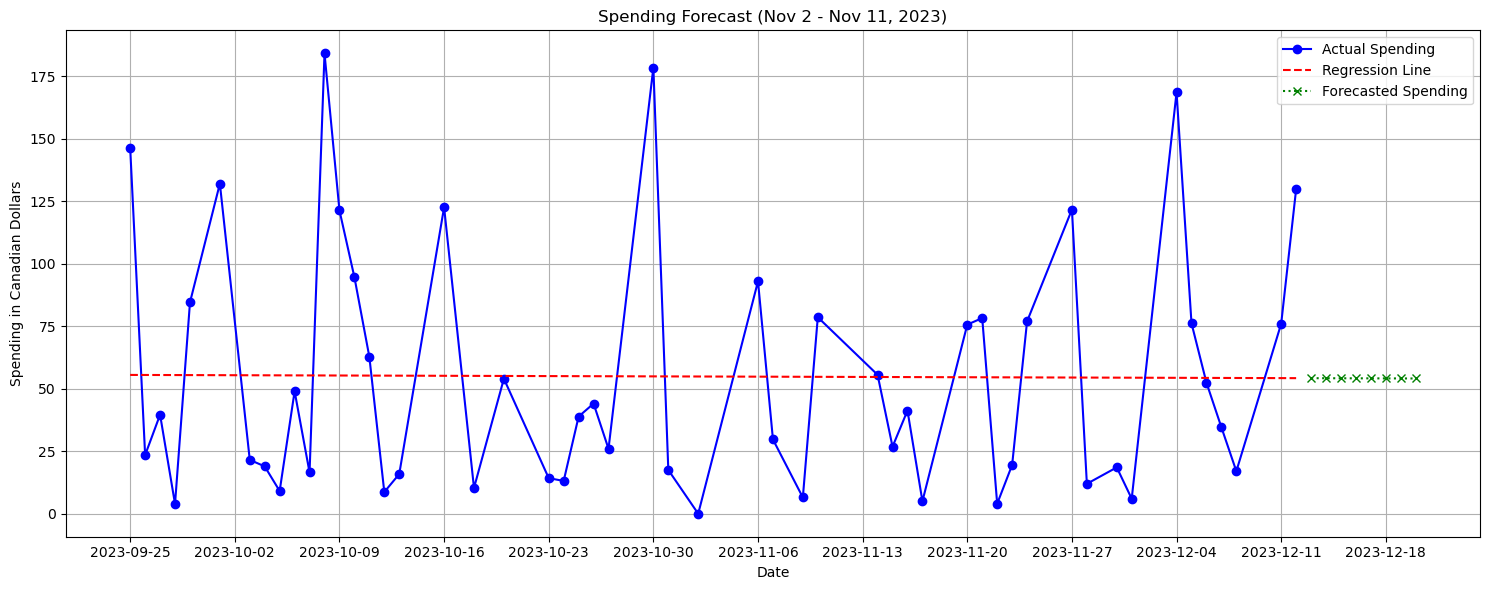

Now that we've created linear regression, we can implement forecasting of my future spendings


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from datetime import datetime, timedelta
from matplotlib.dates import WeekdayLocator, DateFormatter

# Your existing code for data preparation
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Filter the DataFrame
start_date = "2023-09-25"
end_date = "2023-12-12"
mask = (df['date'] >= start_date) & (df['date'] <= end_date) # all the dates that are not in the bound are ignored
filtered_df = df.loc[mask] 

# Calculate daily spending
filtered_df['transaction'] = pd.to_numeric(filtered_df['transaction'], errors='coerce').fillna(0)
daily_spending = filtered_df.groupby(filtered_df['date'].dt.date)['transaction'].sum().reset_index()


daily_spending['date'] = pd.to_datetime(daily_spending['date'])

# Prepare data for linear regression
# Convert dates to numerical format (number of days since the start date)
daily_spending['date_num'] = (daily_spending['date'] - daily_spending['date'].min()).dt.days

# Fit the linear regression model
X = daily_spending['date_num'].values.reshape(-1, 1)
y = daily_spending['transaction'].values
model = LinearRegression().fit(X, y)

# Predict spending for each date
predicted_spending = model.predict(X)

# Generate new dates for the forecast period (Nov 3rd to Nov 10th)
forecast_start_date = pd.to_datetime('2023-12-13')
forecast_end_date = pd.to_datetime('2023-12-20')
forecast_dates = pd.date_range(forecast_start_date, forecast_end_date)

# Convert forecast dates to numerical format and then to a NumPy array
forecast_dates_num = (forecast_dates - daily_spending['date'].min()).days
forecast_dates_num_array = forecast_dates_num.to_numpy().reshape(-1, 1)

# Predict spending for the forecast dates
forecast_spending = model.predict(forecast_dates_num_array)

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(daily_spending['date'], daily_spending['transaction'], color='blue', marker='o', linestyle='-', label='Actual Spending')
plt.plot(daily_spending['date'], predicted_spending, color='red', linestyle='--', label='Regression Line')
plt.plot(forecast_dates, forecast_spending, color='green', marker='x', linestyle=':', label='Forecasted Spending')

plt.title('Spending Forecast (Nov 2 - Nov 11, 2023)')
plt.xlabel('Date')
plt.ylabel('Spending in Canadian Dollars')
plt.grid(True)

# Set x-axis major locator to WeekdayLocator for weekly ticks
plt.gca().xaxis.set_major_locator(WeekdayLocator(byweekday=0))  # 0 for Monday
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()


print("Now that we've created linear regression, we can implement forecasting of my future spendings")

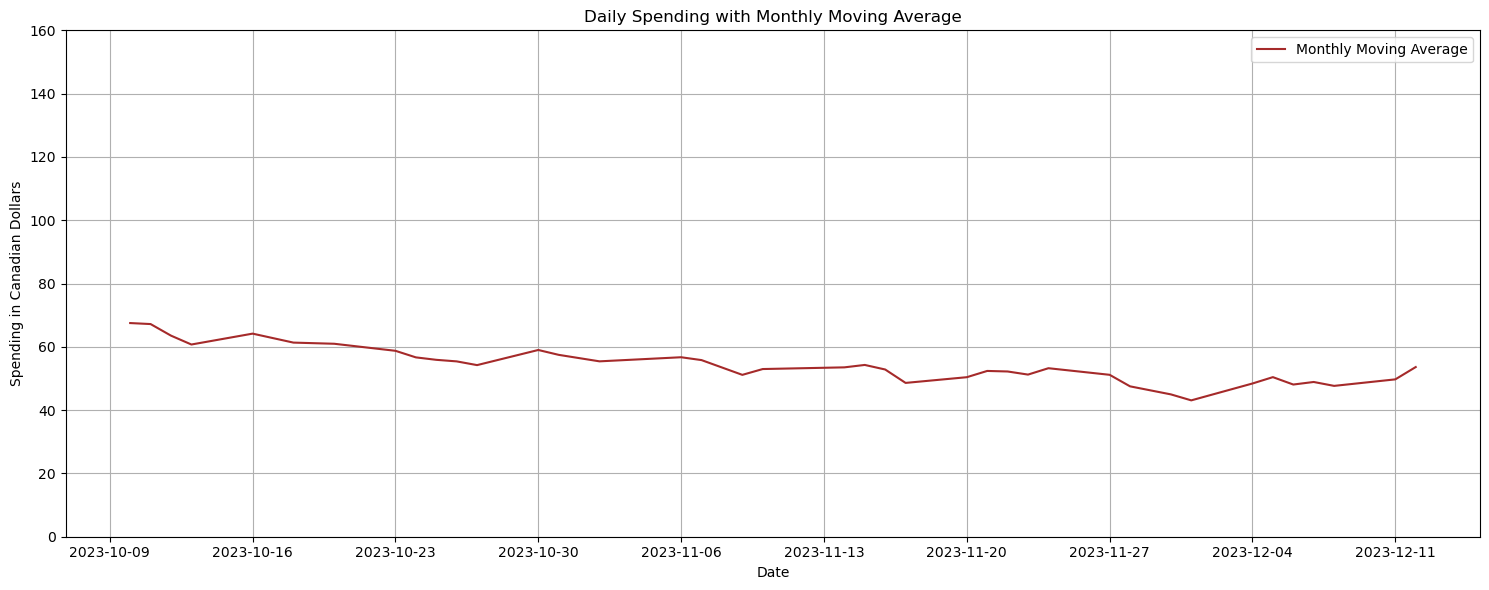

Now because we had a bit of an oscilating graph, we have performed a moving average of this data to smoothen the trend of the graph.
This is a representation of the trend of my spending from the early October to early December.


In [13]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from datetime import datetime
from matplotlib.dates import WeekdayLocator, DateFormatter

# Your existing code for data preparation
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Filter the DataFrame
start_date = "2023-09-25"
end_date = "2023-12-12"
mask = (df['date'] >= start_date) & (df['date'] <= end_date) # all the dates that are not in the bound are ignored
filtered_df = df.loc[mask] 

# Calculate daily spending
filtered_df['transaction'] = pd.to_numeric(filtered_df['transaction'], errors='coerce').fillna(0)
daily_spending = filtered_df.groupby(filtered_df['date'].dt.date)['transaction'].sum().reset_index()


daily_spending['date'] = pd.to_datetime(daily_spending['date'])

# Prepare data for linear regression
# Convert dates to numerical format (number of days since the start date)
daily_spending['date_num'] = (daily_spending['date'] - daily_spending['date'].min()).dt.days

# Fit the linear regression model
X = daily_spending['date_num'].values.reshape(-1, 1)
y = daily_spending['transaction'].values
model = LinearRegression().fit(X, y)

# Predict spending for each date
predicted_spending = model.predict(X)

# Calculate a Weekly moving average of daily spending
daily_spending['week_avg'] = daily_spending['transaction'].rolling(window=30, min_periods=14).mean()

# Plotting
plt.figure(figsize=(15, 6))

plt.plot(daily_spending['date'], daily_spending['week_avg'], color='brown', linestyle="-",label='Monthly Moving Average')

plt.title('Daily Spending with Monthly Moving Average')
plt.xlabel('Date')
plt.ylabel('Spending in Canadian Dollars')
plt.ylim(0,160)
plt.grid(True)



# Set x-axis major locator to WeekdayLocator for weekly ticks
plt.gca().xaxis.set_major_locator(WeekdayLocator(byweekday=0))  # 0 for Monday
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))


plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

print("Now because we had a bit of an oscilating graph, we have performed a moving average of this data to smoothen the trend of the graph.")
print("This is a representation of the trend of my spending from the early October to early December.")
